In [10]:
import sys, os
sys.path.insert(0, os.path.abspath(".."))  # go up one level

import glob
import pandas as pd
from sklearn.model_selection import train_test_split

from models.base_models import get_base_models
from models.core_models import make_child_model
from utils.resampling_registry import get_resamplers
from utils.scoring import score_model
from utils.battle_logger import BattleLogger

In [12]:
def load_all_datasets_with_baseline(folder="./synthetic_datasets"):
    files = sorted(glob.glob(os.path.join(folder, "*.csv")))
    datasets = []
    for f in files:
        df = pd.read_csv(f)
        X = df.drop("rare_event", axis=1)
        y = df["rare_event"]
        baseline_pr_auc = y.mean()  # Random guess baseline = positive class rate
        datasets.append((os.path.basename(f), X, y, baseline_pr_auc))
    return datasets

datasets = load_all_datasets_with_baseline()

# Optional: preview baseline stats
for name, _, _, baseline in datasets:
    print(f"📊 {name} — Baseline PR AUC: {baseline:.3f}")

📊 baseline_easy_w5_n5_d0.csv — Baseline PR AUC: 0.055
📊 high_drift_w3_n10_d60.csv — Baseline PR AUC: 0.036
📊 imbalanced_sparse_w0_n10_d10.csv — Baseline PR AUC: 0.011
📊 mixed_realistic_w4_n15_d30.csv — Baseline PR AUC: 0.045
📊 noisy_overlap_w2_n20_d0.csv — Baseline PR AUC: 0.026


In [22]:
# # 🧠 Run models across datasets and resamplers
# results = []

# with BattleLogger(
#     to_file="logs/battle_log.txt",
#     js_file="logs/battle_log_data.js",
#     inject_html=True,
#     html_template="battle_template.html",
#     html_output="battle_arena.html"
# ):
#     for model_cfg in get_base_models():
#         model_name = model_cfg["name"]
#         model = model_cfg["model"]

#         for dataset_name, X, y in datasets:
#             X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
#             resamplers = get_resamplers(X_train, y_train, target_col="rare_event")

#             for resampler_name, resample_func in resamplers.items():
#                 try:
#                     X_res, y_res = resample_func()
#                     model.fit(X_res, y_res)
#                     y_prob = model.predict_proba(X_test)[:, 1]

#                     scores = score_model(y_test, y_prob)
#                     scores.update({
#                         "model": model_name,
#                         "resampler": resampler_name,
#                         "dataset": dataset_name
#                     })
#                     print(f"[✅] {model_name} + {resampler_name} on {dataset_name} → PR AUC: {scores['pr_auc']:.3f}")
#                     results.append(scores)

#                 except Exception as e:
#                     print(f"[⚠️] Failed: {model_name} + {resampler_name} on {dataset_name}: {e}")

# # 🧠 Run models across datasets and resamplers
# results = []

# with BattleLogger(
#     to_file="logs/battle_log.txt",
#     js_file="logs/battle_log_data.js",
#     inject_html=True,
#     html_template="battle_template.html",
#     html_output="battle_arena.html"
# ):
#     for model_cfg in get_base_models():
#         model_name = model_cfg["name"]
#         model = model_cfg["model"]

#         for dataset_name, X, y in datasets:
#             X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
#             resamplers = get_resamplers(X_train, y_train, target_col="rare_event")

#             for resampler_name, resample_func in resamplers.items():
#                 try:
#                     X_res, y_res = resample_func()
#                     model.fit(X_res, y_res)
#                     y_prob = model.predict_proba(X_test)[:, 1]

#                     scores = score_model(y_test, y_prob)
#                     scores.update({
#                         "model": model_name,
#                         "resampler": resampler_name,
#                         "dataset": dataset_name
#                     })
#                     print(f"[✅] {model_name} + {resampler_name} on {dataset_name} → PR AUC: {scores['pr_auc']:.3f}")
#                     results.append(scores)

#                 except Exception as e:
#                     print(f"[⚠️] Failed: {model_name} + {resampler_name} on {dataset_name}: {e}")

# # 🧠 Run models across datasets and resamplers
# results = []

# with BattleLogger(
#     to_file="logs/battle_log.txt",
#     js_file="logs/battle_log_data.js",
#     inject_html=True,
#     html_template="battle_template.html",
#     html_output="battle_arena.html"
# ):
#     for model_cfg in get_base_models():
#         model_name = model_cfg["name"]
#         model = model_cfg["model"]

#         for dataset in datasets:
#             dataset_name = dataset["name"]
#             X = dataset["X"]
#             y = dataset["y"]

#             X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
#             resamplers = get_resamplers(X_train, y_train, target_col="rare_event")

#             for resampler_name, resample_func in resamplers.items():
#                 try:
#                     X_res, y_res = resample_func()
#                     model.fit(X_res, y_res)
#                     y_prob = model.predict_proba(X_test)[:, 1]

#                     scores = score_model(y_test, y_prob)
#                     scores.update({
#                         "model": model_name,
#                         "resampler": resampler_name,
#                         "dataset": dataset_name
#                     })
#                     print(f"[✅] {model_name} + {resampler_name} on {dataset_name} → PR AUC: {scores['pr_auc']:.3f}")
#                     results.append(scores)

#                 except Exception as e:
#                     print(f"[⚠️] Failed: {model_name} + {resampler_name} on {dataset_name}: {e}")

results = []

with BattleLogger(
    to_file="logs/battle_log.txt",
    js_file="logs/battle_log_data.js",
    inject_html=True,
    html_template="battle_template.html",
    html_output="battle_arena.html"
):
    for model_cfg in get_base_models():
        model_name = model_cfg["name"]
        model = model_cfg["model"]

        for dataset_name, X, y, baseline in datasets:
            X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
            resamplers = get_resamplers(X_train, y_train, target_col="rare_event")

            for resampler_name, resample_func in resamplers.items():
                try:
                    X_res, y_res = resample_func()
                    model.fit(X_res, y_res)
                    y_prob = model.predict_proba(X_test)[:, 1]

                    scores = score_model(y_test, y_prob)
                    scores.update({
                        "model": model_name,
                        "resampler": resampler_name,
                        "dataset": dataset_name,
                        "baseline_pr_auc": baseline,
                        "beats_baseline": scores['pr_auc'] > baseline
                    })
                    print(f"[✅] {model_name} + {resampler_name} on {dataset_name} → PR AUC: {scores['pr_auc']:.3f}")
                    results.append(scores)

                except Exception as e:
                    print(f"[⚠️] Failed: {model_name} + {resampler_name} on {dataset_name}: {e}")

/Users/sophiaboettcher/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sophiaboettcher/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sophiaboettcher/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sophiaboettcher/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sophiaboettcher/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [24]:
# 💾 Save scores
df_results = pd.DataFrame(results)
os.makedirs("logs", exist_ok=True)
df_results.to_csv("logs/leaderboard_Downloadable.csv", index=False)
print("✅ Scores saved to logs/leaderboard_Downloadable.csv")

✅ Scores saved to logs/leaderboard_Downloadable.csv


In [30]:
print(df_results.columns.tolist())

['pr_auc', 'roc_auc', 'model', 'resampler', 'dataset', 'baseline_pr_auc', 'beats_baseline']


,model,resampler,avg_pr_auc,std,count
20,Elastic_L30_C1,Cluster Centroids,0.233203,0.255174,5
23,Elastic_L30_C1,Random Undersample,0.225031,0.285723,5
32,Elastic_L50_C5,Random Undersample,0.216870,0.284994,5
14,Elastic_L100_C10,Random Undersample,0.216285,0.284633,5
41,Elastic_L70_C10,Random Undersample,0.215371,0.284307,5
40,Elastic_L70_C10,No Resampling,0.214408,0.269537,5
5,Elastic_L0_C10,Random Undersample,0.212825,0.283782,5
21,Elastic_L30_C1,Manual Upsampling,0.212760,0.269284,5
29,Elastic_L50_C5,Cluster Centroids,0.212519,0.252299,5
22,Elastic_L30_C1,No Resampling,0.212253,0.273712,5


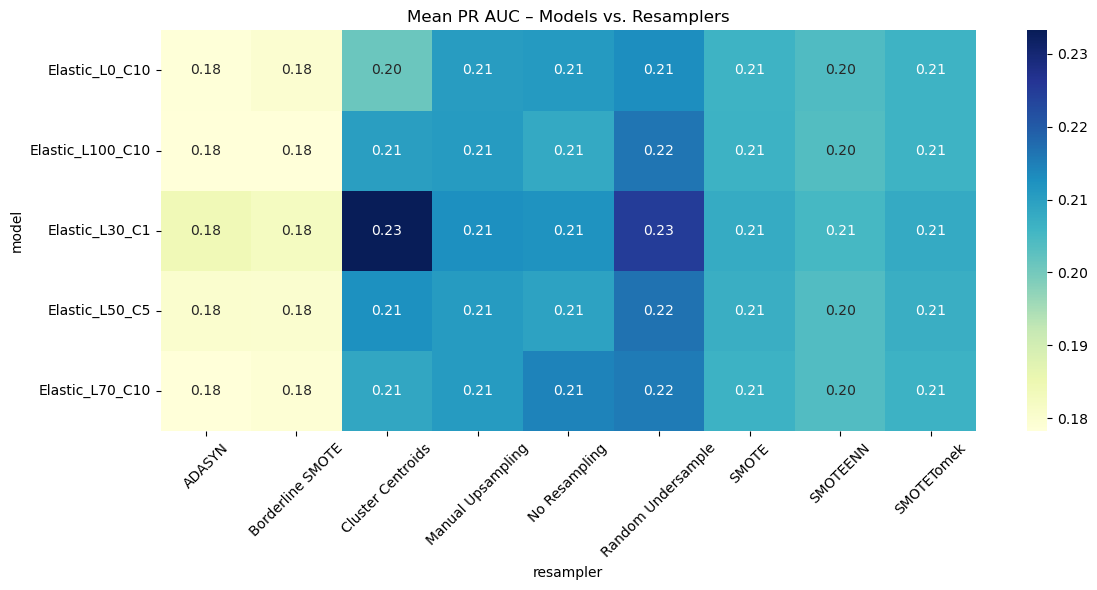

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the leaderboard CSV
df = pd.read_csv("logs/leaderboard_Downloadable.csv")

# ------------------------
# 1. Mean PR AUC per Combo
# ------------------------
summary = (
    df.groupby(["model", "resampler"])
      .agg(avg_pr_auc=("pr_auc", "mean"), std=("pr_auc", "std"), count=("dataset", "count"))
      .reset_index()
      .sort_values("avg_pr_auc", ascending=False)
)

display(summary)

# ------------------------
# 2. Heatmap Visualization
# ------------------------
pivot = df.pivot_table(index="model", columns="resampler", values="pr_auc", aggfunc="mean")

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Mean PR AUC – Models vs. Resamplers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()